In [2]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X = pd.read_csv('dollar_tenge.csv', encoding = 'UTF-8', delimiter = ';')
X = X.drop(['USD_quant'], axis = 1)
X_1_year = X[:366]

Берем данные за год

In [4]:
X_1_year

,Date,USD
0,2019-01-01,384.20
1,2019-01-02,384.20
2,2019-01-03,384.20
3,2019-01-04,381.38
4,2019-01-05,378.12
...,...,...
361,2019-12-28,380.44
362,2019-12-29,380.44
363,2019-12-30,380.44
364,2019-12-31,381.18


In [5]:
Date = X_1_year['Date'].values
series = X_1_year['USD'].values
N = len(series)
tau = (N + 1) // 8
r = 15
print(N, tau)

366 45


1. Преобразование одномерного ряда в многомерный

In [6]:
full_X = [series[i: N - tau + i] for i in range(tau)]
full_X = np.array(full_X)
full_X.shape

(45, 321)

Считаем ковариационную матрицу

In [7]:
covMatrix = np.cov(full_X)
L, V = np.linalg.eig(covMatrix)

In [8]:
L

array([7.15334721e+02, 3.52234247e+01, 2.26001266e+01, 1.67516364e+01,
       6.54605862e+00, 6.36691721e+00, 2.92056568e+00, 1.79900883e+00,
       1.72259927e+00, 1.69803281e+00, 1.59521962e+00, 1.34284626e+00,
       1.13305165e+00, 1.24147994e+00, 1.20850111e+00, 1.19391126e+00,
       7.93971907e-01, 4.20805804e-01, 4.09839191e-01, 3.89098914e-01,
       3.54637751e-01, 3.42643666e-01, 3.06426092e-01, 2.91351644e-01,
       2.87037012e-01, 2.62563120e-01, 2.57133991e-01, 2.45836284e-01,
       2.29821382e-01, 2.26452884e-01, 6.14283112e-02, 1.93920349e-01,
       1.77498050e-01, 1.76865101e-01, 8.52087321e-02, 1.59796045e-01,
       1.51696993e-01, 9.70695196e-02, 1.40010517e-01, 1.31810474e-01,
       1.06228447e-01, 1.08985336e-01, 1.15568787e-01, 1.19727089e-01,
       1.21607573e-01])

In [9]:
V

array([[ 0.14788525,  0.1535969 , -0.11577085, ..., -0.04749842,
        -0.05552948, -0.00408814],
       [ 0.14969253,  0.16094823, -0.1435594 , ...,  0.07645181,
         0.09987855, -0.02669943],
       [ 0.15132378,  0.1656785 , -0.16463754, ..., -0.03454185,
        -0.05463073,  0.090432  ],
       ...,
       [ 0.13996223, -0.20870986, -0.14707966, ...,  0.02156238,
         0.10462874,  0.09113472],
       [ 0.13802631, -0.20922664, -0.13339245, ..., -0.09214676,
        -0.14671573,  0.01117808],
       [ 0.13593544, -0.20678024, -0.11549657, ...,  0.06464084,
         0.07749826, -0.03231913]])

Выберем первые 15 главных векторов.

In [10]:
V = V[:r]

Считаем Y

In [11]:
Y = V.transpose()
Y = Y.dot(full_X[:r])

Восстанавливаем исходную матрицу Х используя первые r = 15 собственных векторов V

In [12]:
new_X = V.dot(Y)
new_X

array([[384.2 , 384.2 , 384.2 , ..., 388.49, 388.07, 388.07],
       [384.2 , 384.2 , 381.38, ..., 388.07, 388.07, 388.07],
       [384.2 , 381.38, 378.12, ..., 388.07, 388.07, 387.14],
       ...,
       [376.06, 376.06, 378.29, ..., 386.49, 386.19, 386.31],
       [376.06, 378.29, 377.85, ..., 386.19, 386.31, 386.35],
       [378.29, 377.85, 377.95, ..., 386.31, 386.35, 386.35]])

Посмотрим результат на графиках

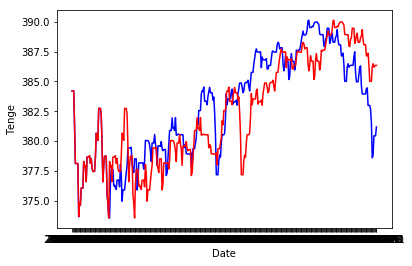

In [13]:
real = np.hstack((full_X[0][:tau], full_X[tau - 1]))
prediction = np.hstack((new_X[0][:tau], new_X[r - 1]))

plt.plot(Date, real, 'b')
plt.plot(Date, prediction, 'r' )
plt.xlabel('Date')
plt.ylabel('Tenge')
plt.show()

Предскажем теперь до 10.03.2020.
Делаем аналогично. 

In [14]:
X

,Date,USD
0,2019-01-01,384.20
1,2019-01-02,384.20
2,2019-01-03,384.20
3,2019-01-04,381.38
4,2019-01-05,378.12
...,...,...
430,2020-03-06,380.53
431,2020-03-07,382.05
432,2020-03-08,382.05
433,2020-03-09,382.05


In [15]:
Date = X['Date'].values
series = X['USD'].values
N = len(series)
tau = (N + 1) // 8
r = 15
print(N, tau)

435 54


In [16]:
Full_X = [series[i: N - tau + i] for i in range(tau)]
Full_X = np.array(Full_X)

In [17]:
covMatrix_F = np.cov(Full_X)
L_F, V_F = np.linalg.eig(covMatrix_F)

In [18]:
V_F = V_F[:r]

In [19]:
Y_F = V_F.transpose()
Y_F = Y_F.dot(Full_X[:r])

In [20]:
pred_X = V_F.dot(Y_F)

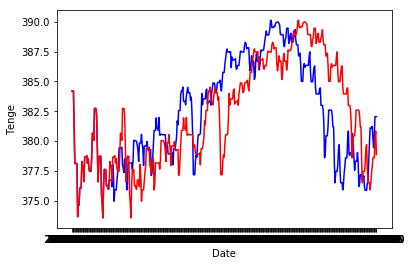

In [21]:
real_F = np.hstack((Full_X[0][:tau], Full_X[tau - 1]))
prediction_F = np.hstack((pred_X[0][:tau], pred_X[r - 1]))

plt.plot(Date, real_F, 'b')
plt.plot(Date, prediction_F, 'r')
plt.xlabel('Date')
plt.ylabel('Tenge')

plt.show()